# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn  as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objects as go


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [3]:
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [4]:
X=df.drop(columns={'median_house_value'},axis=True)
y=df[['median_house_value']]
print('x',X.head(5))
print('*' * 100)
print('x',y.head(5))


x    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  
****************************************************************************************************
x    median_house_value
0            452600.0
1            358500.0
2            352100.0
3 

In [5]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=.2, random_state=1234)

In [6]:
x_train.shape

(16512, 9)

In [7]:
x_test.shape

(4128, 9)

In [8]:
y_train.shape

(16512, 1)

In [9]:
y_test.shape

(4128, 1)

# `03` Exploratory and Visual Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

In [10]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 17595 to 1318
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16345 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [11]:
x_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16345.000000,16512.000000,16512.000000,16512.000000
mean,-119.563525,35.627453,28.618278,2624.102471,535.801101,1421.609072,497.466509,3.875727
std,2.000056,2.135843,12.546547,2138.694798,414.622634,1124.088834,377.119641,1.907794
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.930000,18.000000,1451.000000,296.000000,790.750000,280.000000,2.562500
50%,-118.480000,34.250000,29.000000,2128.000000,435.000000,1166.500000,410.000000,3.538950
75%,-118.000000,37.710000,37.000000,3132.000000,646.000000,1722.250000,602.000000,4.750000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


In [12]:
x_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        167
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [13]:
x_train.duplicated().sum()

0

In [14]:
x_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [15]:
x_train.index

Index([17595,  6073,  6251,  3161,  1887,   151,  8888,  6273,  7383, 19964,
       ...
       13686,  7962,  8060,  7916,  1182,  8222,  9449,  8471, 17048,  1318],
      dtype='int64', length=16512)

In [16]:
x_train.shape

(16512, 9)

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will b

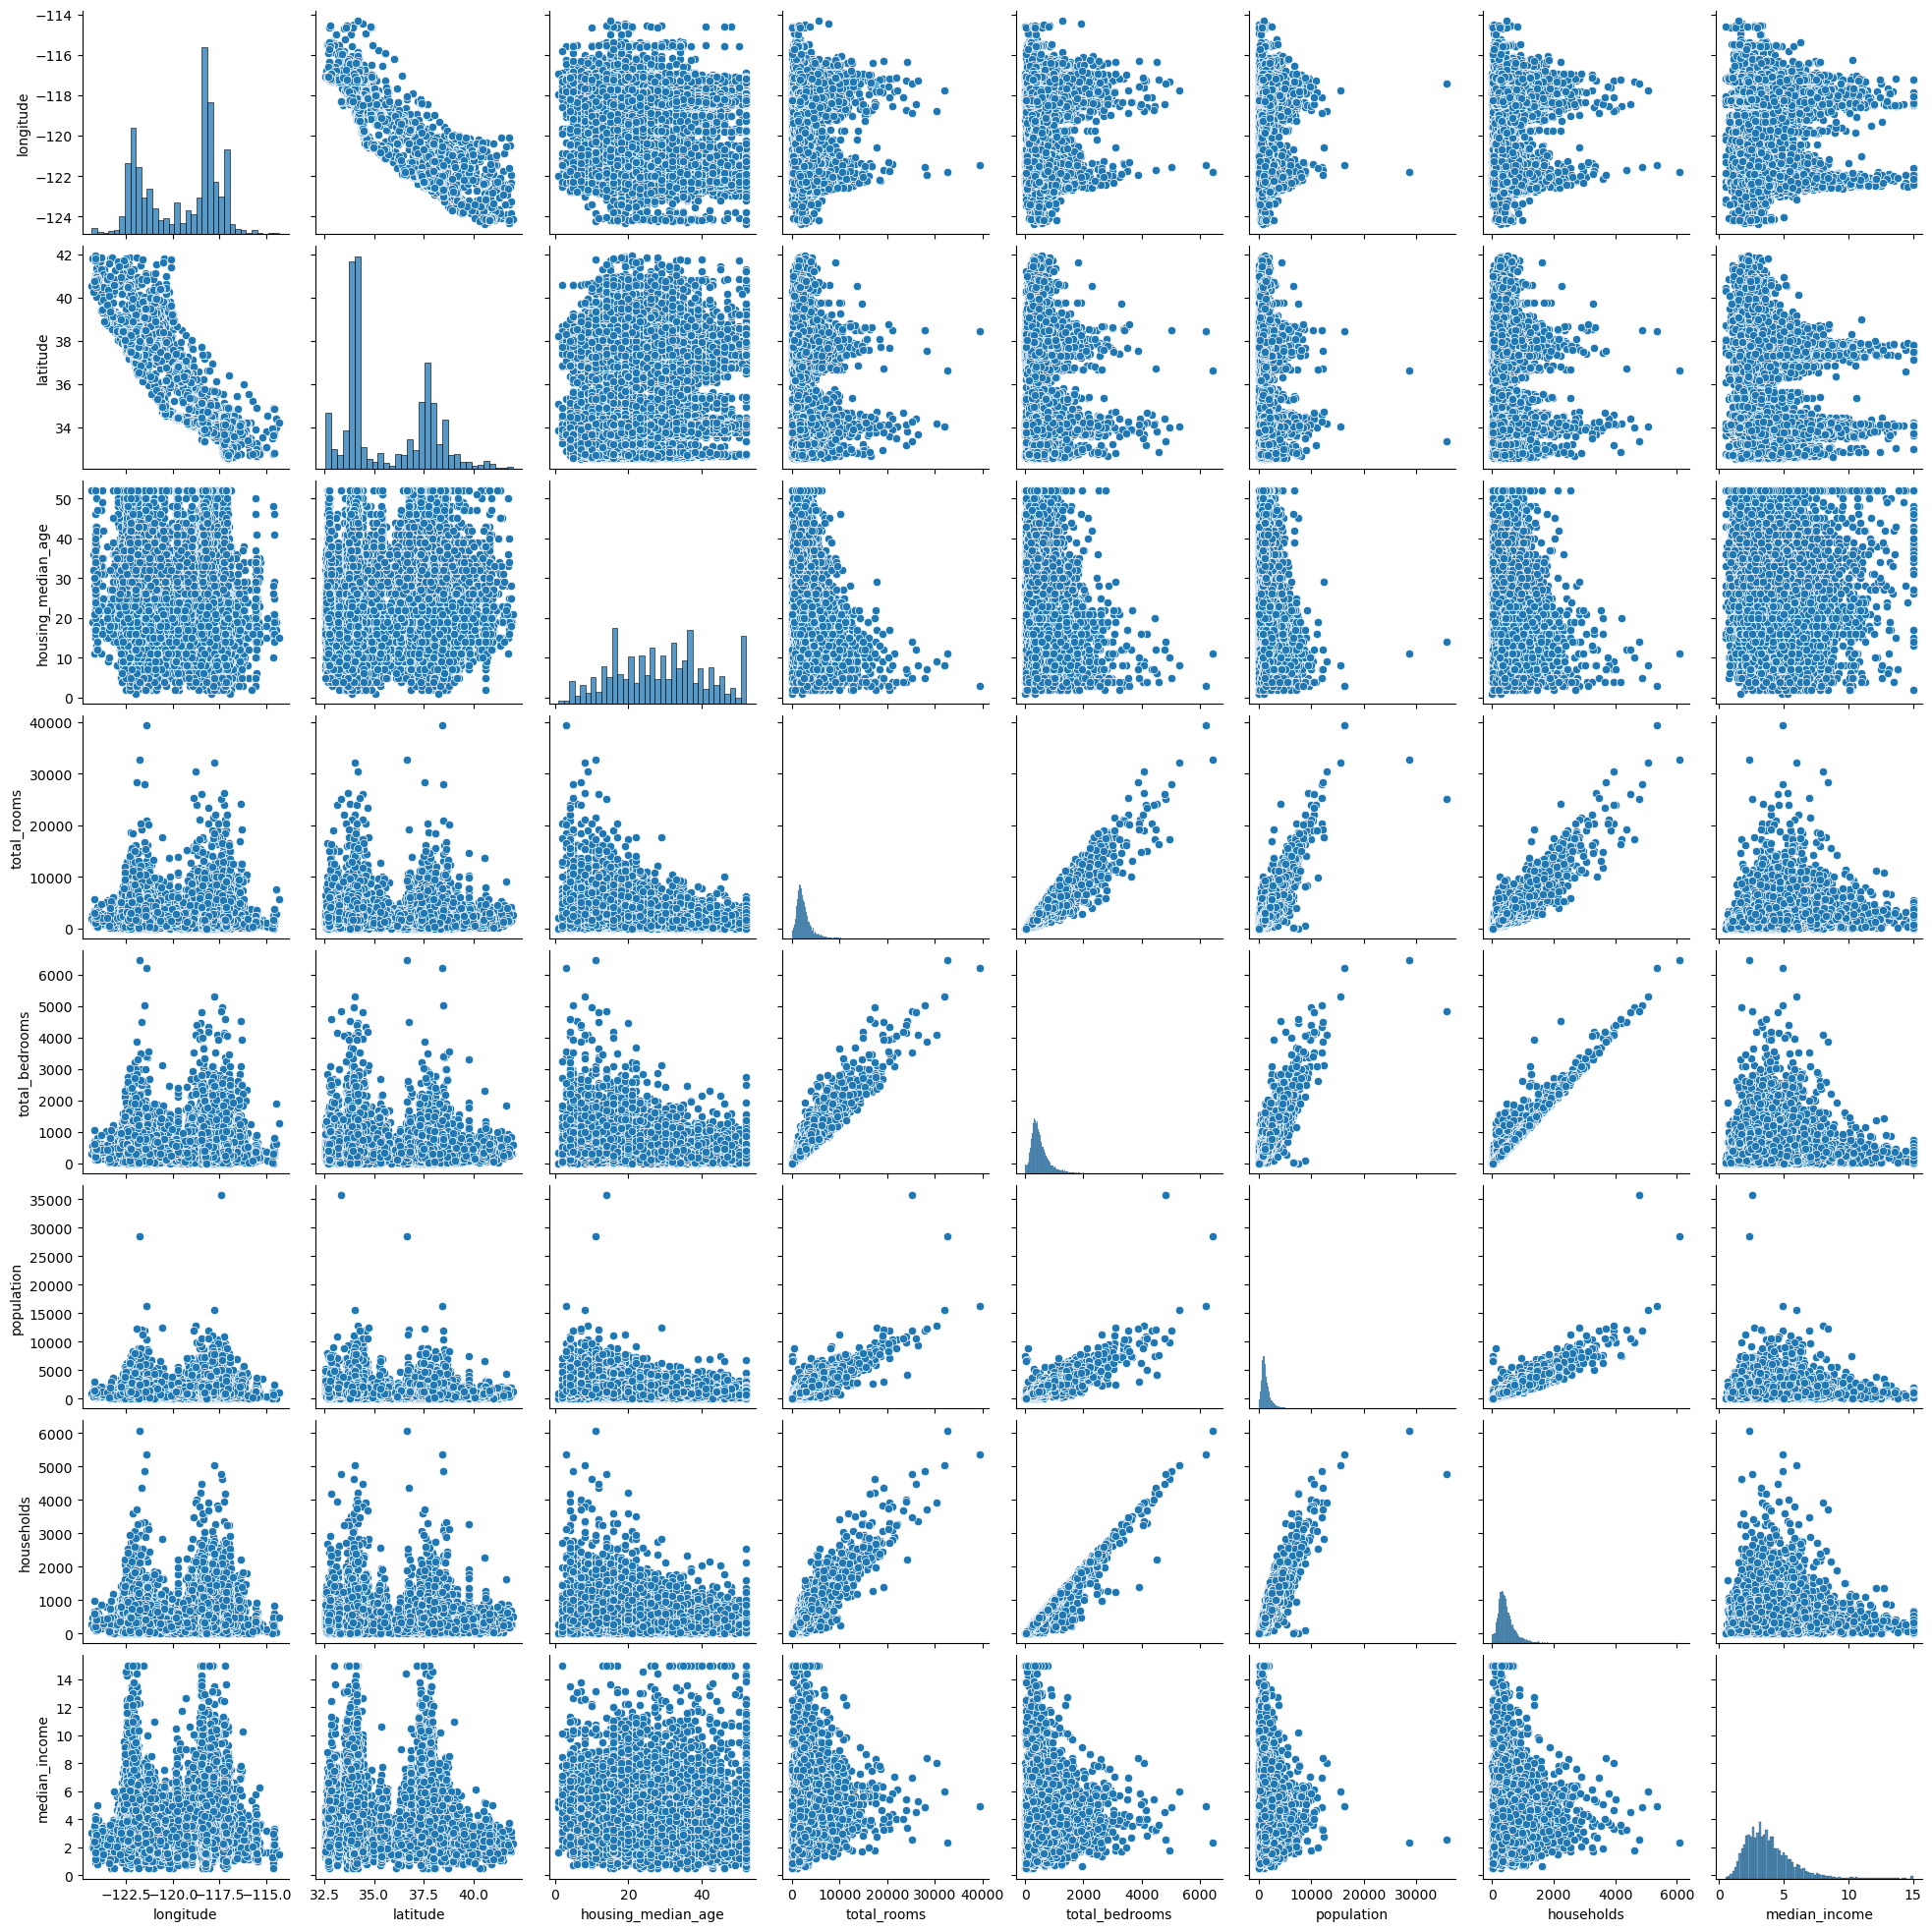

In [17]:
sns.pairplot(x_train)

In [18]:
x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17595,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682,<1H OCEAN
6073,-117.85,34.07,32.0,761.0,101.0,295.0,95.0,11.1077,<1H OCEAN
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.1190,<1H OCEAN
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656,INLAND
1887,-119.98,38.92,27.0,2682.0,606.0,1010.0,399.0,3.1500,INLAND


C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



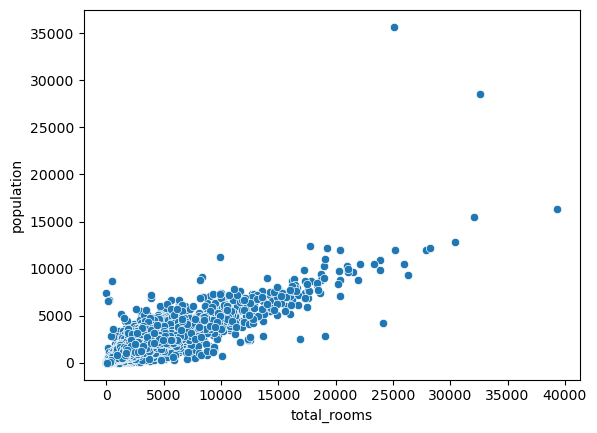

In [19]:
sns.scatterplot(data=x_train,x='total_rooms',y='population')
plt.xlabel('total_rooms')
plt.ylabel('population')
plt.show()

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



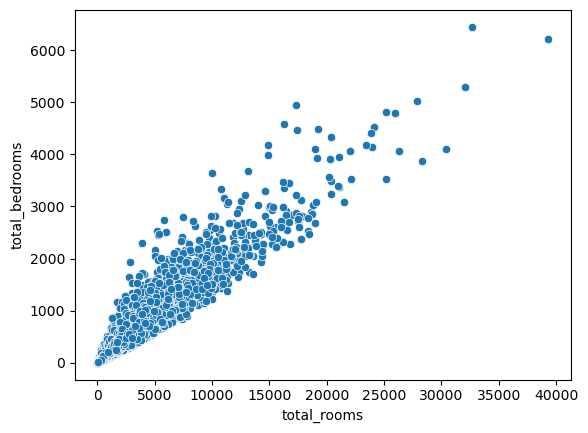

In [20]:
sns.scatterplot(data=x_train,x='total_rooms',y='total_bedrooms')
plt.xlabel('total_rooms')
plt.ylabel('total_bedrooms')
plt.show()

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Hendy Group\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



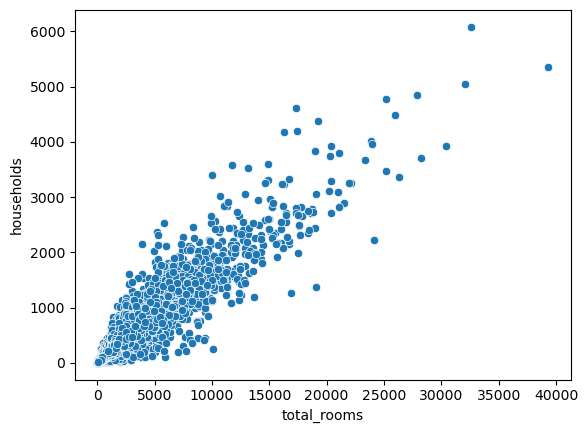

In [21]:
sns.scatterplot(data=x_train,x='total_rooms',y='households')
plt.xlabel('total_rooms')
plt.ylabel('households')
plt.show()

----------------

# `04` Data Preparation and  Prepare Test Set

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

In [23]:
sample_incomplete_rows = x_train[x_train.isnull().any(axis=1)].head()
sample_incomplete_rows


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2412,-119.45,36.61,24.0,1302.0,NaN,693.0,243.0,3.7917,INLAND
18466,-121.75,37.11,18.0,3167.0,NaN,1414.0,482.0,6.8773,<1H OCEAN
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,INLAND
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
19122,-122.65,38.25,23.0,4030.0,NaN,1852.0,778.0,3.4020,<1H OCEAN


In [22]:
housing_labels = df["median_house_value"].copy()

In [24]:
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [26]:
housing_num = x_train.drop("ocean_proximity", axis=1)

In [27]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [28]:
imputer.statistics_

array([-118.48   ,   34.25   ,   29.     , 2128.     ,  435.     ,
       1166.5    ,  410.     ,    3.53895])

In [29]:
housing_num.median().values

array([-118.48   ,   34.25   ,   29.     , 2128.     ,  435.     ,
       1166.5    ,  410.     ,    3.53895])

In [30]:
X = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=x_train.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17595,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682
6073,-117.85,34.07,32.0,761.0,101.0,295.0,95.0,11.1077
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.1190
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656
1887,-119.98,38.92,27.0,2682.0,606.0,1010.0,399.0,3.1500
...,...,...,...,...,...,...,...,...
8222,-118.23,33.76,21.0,49.0,14.0,29.0,16.0,5.0000
9449,-119.85,37.39,14.0,2744.0,555.0,1153.0,474.0,2.7530
8471,-118.32,33.91,33.0,1729.0,396.0,1073.0,344.0,4.2083
17048,-122.27,37.47,44.0,3022.0,473.0,1235.0,477.0,6.7058


In [32]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,index=housing_num.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17595,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682
6073,-117.85,34.07,32.0,761.0,101.0,295.0,95.0,11.1077
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.1190
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656
1887,-119.98,38.92,27.0,2682.0,606.0,1010.0,399.0,3.1500
...,...,...,...,...,...,...,...,...
8222,-118.23,33.76,21.0,49.0,14.0,29.0,16.0,5.0000
9449,-119.85,37.39,14.0,2744.0,555.0,1153.0,474.0,2.7530
8471,-118.32,33.91,33.0,1729.0,396.0,1073.0,344.0,4.2083
17048,-122.27,37.47,44.0,3022.0,473.0,1235.0,477.0,6.7058


In [33]:
housing_cat = x_train[["ocean_proximity"]]
housing_cat.head(5)

,ocean_proximity
17595,<1H OCEAN
6073,<1H OCEAN
6251,<1H OCEAN
3161,INLAND
1887,INLAND


In [34]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [3.],
       [0.],
       [0.],
       [0.],
       [1.]])

In [35]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [37]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [38]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

C:\Users\Hendy Group\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [39]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [40]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17595,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682,<1H OCEAN
6073,-117.85,34.07,32.0,761.0,101.0,295.0,95.0,11.1077,<1H OCEAN
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.1190,<1H OCEAN
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656,INLAND
1887,-119.98,38.92,27.0,2682.0,606.0,1010.0,399.0,3.1500,INLAND
...,...,...,...,...,...,...,...,...,...
8222,-118.23,33.76,21.0,49.0,14.0,29.0,16.0,5.0000,NEAR OCEAN
9449,-119.85,37.39,14.0,2744.0,555.0,1153.0,474.0,2.7530,INLAND
8471,-118.32,33.91,33.0,1729.0,396.0,1073.0,344.0,4.2083,<1H OCEAN
17048,-122.27,37.47,44.0,3022.0,473.0,1235.0,477.0,6.7058,NEAR OCEAN


In [41]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(x_train.values)

In [42]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [x_train.columns.get_loc(c) for c in col_names]

In [43]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(x_train.columns)+["rooms_per_household", "population_per_household"],
    index=x_train.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17595,-121.89,37.31,40.0,1844.0,340.0,719.0,305.0,3.3682,<1H OCEAN,6.045902,2.357377
6073,-117.85,34.07,32.0,761.0,101.0,295.0,95.0,11.1077,<1H OCEAN,8.010526,3.105263
6251,-117.97,34.04,32.0,1507.0,295.0,1326.0,324.0,4.119,<1H OCEAN,4.651235,4.092593
3161,-118.85,35.23,26.0,1639.0,352.0,1222.0,395.0,1.7656,INLAND,4.149367,3.093671
1887,-119.98,38.92,27.0,2682.0,606.0,1010.0,399.0,3.15,INLAND,6.721805,2.531328


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [45]:
housing_num_tr

array([[-1.16323975,  0.78779092,  0.90718721, ...,  0.2599513 ,
        -0.06697356, -0.46280674],
       [ 0.85676443, -0.72922058,  0.26954227, ...,  1.09274462,
         0.00342868, -1.277801  ],
       [ 0.79676431, -0.74326698,  0.26954227, ..., -0.33124021,
         0.0963709 , -0.28341642],
       ...,
       [ 0.62176394, -0.80413472,  0.34924789, ..., -0.17231025,
         0.00473931,  0.24161111],
       [-1.35324014,  0.86270507,  1.22600968, ...,  0.38268064,
        -0.04516046, -0.90236117],
       [-1.10323963,  1.10617605, -1.96221502, ...,  1.02611929,
         0.03046377, -1.18321231]])

In [46]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(x_train)

In [47]:
housing_prepared

array([[-1.16323975,  0.78779092,  0.90718721, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.85676443, -0.72922058,  0.26954227, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.79676431, -0.74326698,  0.26954227, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.62176394, -0.80413472,  0.34924789, ...,  0.        ,
         0.        ,  0.        ],
       [-1.35324014,  0.86270507,  1.22600968, ...,  0.        ,
         0.        ,  1.        ],
       [-1.10323963,  1.10617605, -1.96221502, ...,  0.        ,
         0.        ,  0.        ]])

In [48]:
housing_prepared.shape

(16512, 16)

----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

In [49]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [50]:
model.fit(housing_prepared, y_train)

LinearRegression()

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [52]:
housing = x_train.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(housing)

print("Predictions:", model.predict(some_data_prepared))

Predictions: [[229967.4116039 ]
 [486697.20833566]
 [204079.01744436]
 [ 75933.82443806]
 [ 87985.5013225 ]]


## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

housing_predictions = model.predict(housing_prepared)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [62]:
lin_mae = mean_absolute_error(y_train, housing_predictions)
lin_mae

49098.90451418097

In [63]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [64]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(y_train, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

In [67]:
from sklearn.linear_model import SGDRegressor

In [90]:
sgd_reg = SGDRegressor(penalty=None, alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)  ## with Regularization
sgd_reg.fit(housing_prepared, y_train)

SGDRegressor(eta0=0.001, max_iter=10000, penalty=None)

In [77]:
housing_predictions = sgd_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

4642140245.352264

In [78]:
lin_rmse

68133.25359435189

In [79]:
lin_mae = mean_absolute_error(y_train, housing_predictions)
lin_mae

49125.899217107304

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,r2_score

In [88]:
param_dist = {
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.1,0.001,0.0001,0.01]
}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(sgd_reg, param_distributions=param_dist, scoring=scorer, cv=5, n_iter=10, random_state=1234)

# Fit the RandomizedSearchCV to the training data
random_search.fit(housing_prepared, y_train)

# Get the best model from the search
best_model = random_search.best_estimator_

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Make predictions
predictions_best_model = best_model.predict(housing_prepared)

# Calculate RMSE
rmse_best_model = np.sqrt(mean_squared_error(y_train, predictions_best_model))
r2_best_model = r2_score(y_train, predictions_best_model)
print(f"Best Model - Root Mean Squared Error (RMSE): {rmse_best_model}")
print(f"Best Model - r2_score: {r2_best_model}")

C:\Users\Hendy Group\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.



Best Parameters: {'learning_rate': 'adaptive', 'eta0': 0.0001}
Best Model - Root Mean Squared Error (RMSE): 68100.74681287831
Best Model - r2_score: 0.6503033353790553


In [98]:
sgd_reg = SGDRegressor(penalty='l1', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)  ## with Regularization
sgd_reg.fit(housing_prepared, y_train)

SGDRegressor(eta0=0.001, max_iter=10000, penalty='l1')

In [99]:
housing_predictions = sgd_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

4643018908.772823

In [100]:
lin_mae = mean_absolute_error(y_train, housing_predictions)
lin_mae

49128.92085925445

In [101]:
lin_rmse

68139.70141388076

In [102]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)
sgd_reg.fit(housing_prepared, y_train)

SGDRegressor(eta0=0.001, max_iter=10000)

In [103]:
housing_predictions = sgd_reg.predict(housing_prepared)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_mse

4644629264.85164

In [104]:
lin_mae = mean_absolute_error(y_train, housing_predictions)
lin_mae

49138.292663915585

In [105]:
lin_rmse

68151.51696662107